In [1]:
# %pip install python-dotenv
# %pip install --upgrade azure-cognitiveservices-vision-computervision

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

import os
from dotenv import load_dotenv

# to view images
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

load_dotenv()
cv_client = ComputerVisionClient(
    os.environ.get('endpoint'),
    CognitiveServicesCredentials(os.environ.get('subscription_keys')),
)

In [2]:
def analyse_and_create_bb(image):
    print("Plotting original image")

    plt.figure(figsize=(8, 8))
    img = Image.open(image)
    plt.imshow(img)

    plt.axis("off")
    plt.show()

    analysis = cv_client.analyze_image_in_stream(
        open(image, mode="rb"),
        [
            VisualFeatureTypes.tags,
            VisualFeatureTypes.brands,
            VisualFeatureTypes.objects,
        ],
    )

    print("######### Feature Tagging Starts #########")
    if len(analysis.tags) > 0:
        for tag in analysis.tags:
            print(f"'{tag.name}' with confidence {round(tag.confidence * 100,2)}")
    else:
        print("No image tags detected.")
    print("######### Feature Tagging Ends ######### \n")

    print("######### Brand Detection Starts #########")
    if len(analysis.brands) > 0:
        for brand in analysis.brands:
            print(f"'{brand.name}' with confidence {round(brand.confidence * 100,2)}")
    else:
        print("No brands detected in image.")
    print("######### Brand Detection Ends ######### \n")

    print("######### Object Detection Starts #########")
    if len(analysis.objects) > 0:
        plt.figure(figsize=(8, 8))

        draw = ImageDraw.Draw(img)
        color = "cyan"

        for detected_obj in analysis.objects:
            r = detected_obj.rectangle
            bb = ((r.x, r.y), (r.x + r.w, r.y + r.h))

            print(
                f"'{detected_obj.object_property}' with confidence {round(detected_obj.confidence * 100,2)} and boundary box as -> {bb}"
            )

            draw.rectangle(bb, outline=color, width=3)
            plt.annotate(
                detected_obj.object_property, (r.x, r.y), backgroundcolor=color
            )
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    else:
        print("No objects found in the image")
    print("######### Object Detection Ends #########")

Plotting original image


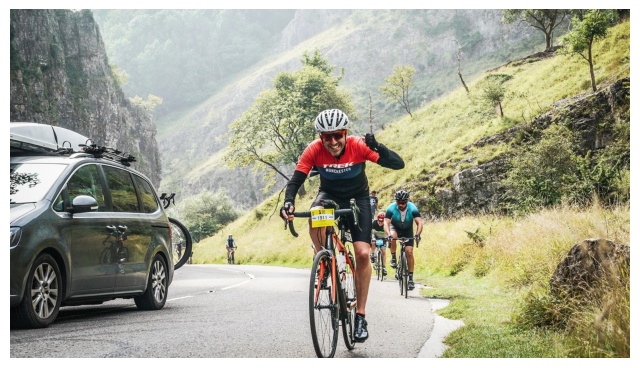

######### Feature Tagging Starts #########
'land vehicle' with confidence 99.93
'wheel' with confidence 99.82
'vehicle' with confidence 99.78
'outdoor' with confidence 99.24
'bicycle wheel' with confidence 98.62
'cycling' with confidence 94.05
'sports equipment' with confidence 93.8
'mountain' with confidence 93.71
'car' with confidence 93.66
'tree' with confidence 92.77
'bicycle helmet' with confidence 92.32
'bicycles--equipment and supplies' with confidence 92.32
'tire' with confidence 92.02
'cycle sport' with confidence 92.02
'bicycle frame' with confidence 91.95
'person' with confidence 91.91
'bicycle handlebar' with confidence 91.72
'transport' with confidence 87.0
'mountain bike' with confidence 85.98
'bicycle pedal' with confidence 85.34
'road bicycle' with confidence 84.85
'grass' with confidence 72.42
'riding' with confidence 71.21
'bicycle' with confidence 65.43
'bike' with confidence 48.23
######### Feature Tagging Ends ######### 

######### Brand Detection Starts #########


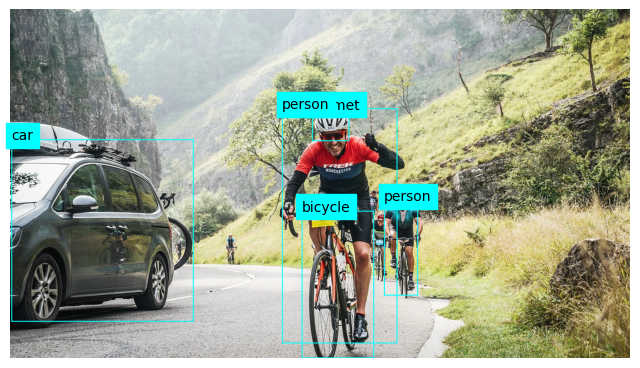

######### Object Detection Ends #########


In [3]:
analyse_and_create_bb("img1.jpeg")

Plotting original image


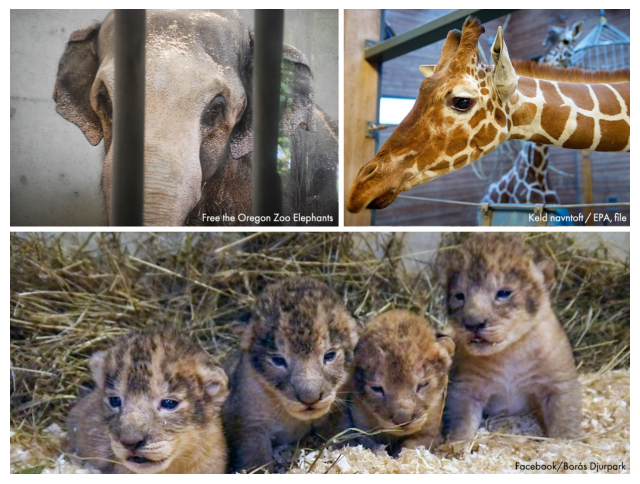

######### Feature Tagging Starts #########
'mammal' with confidence 99.85
'animal' with confidence 99.71
'terrestrial animal' with confidence 96.96
'zoo' with confidence 94.31
'snout' with confidence 90.5
'wildlife' with confidence 90.1
'giraffe' with confidence 87.94
'outdoor' with confidence 82.31
'baby' with confidence 77.85
'standing' with confidence 73.78
'hay' with confidence 66.89
'group' with confidence 66.4
'ground' with confidence 56.89
######### Feature Tagging Ends ######### 

######### Brand Detection Starts #########
No brands detected in image.
######### Brand Detection Ends ######### 

######### Object Detection Starts #########
'mammal' with confidence 85.2 and boundary box as -> ((818, 454), (1122, 850))
'mammal' with confidence 84.8 and boundary box as -> ((94, 616), (422, 900))
'mammal' with confidence 84.7 and boundary box as -> ((419, 515), (677, 891))
'cat' with confidence 58.1 and boundary box as -> ((648, 569), (868, 866))
'giraffe' with confidence 87.2 and bou

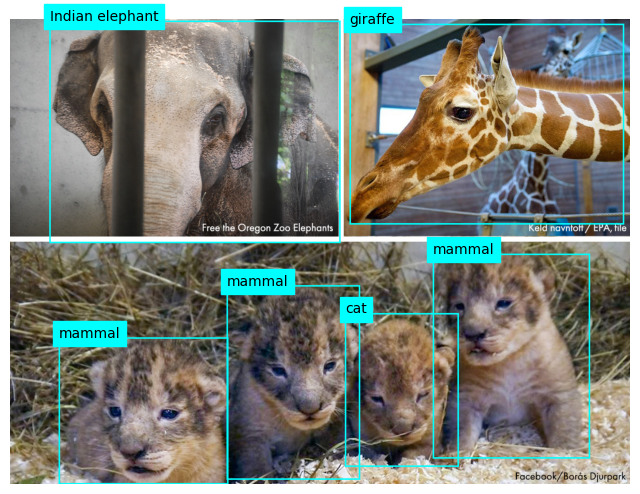

######### Object Detection Ends #########


In [4]:
analyse_and_create_bb("img2.jpg")

Plotting original image


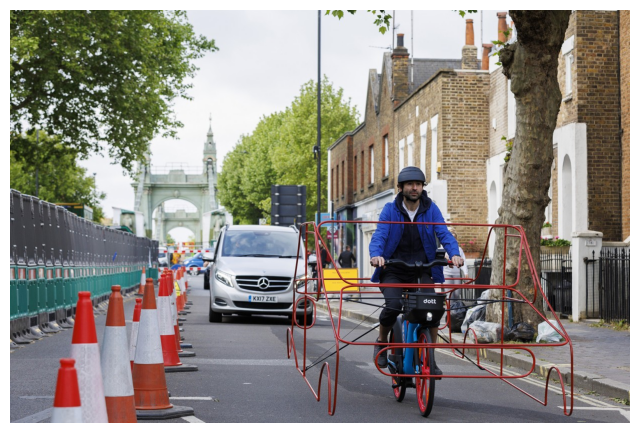

######### Feature Tagging Starts #########
'outdoor' with confidence 99.9
'land vehicle' with confidence 99.83
'vehicle' with confidence 99.57
'wheel' with confidence 99.08
'car' with confidence 97.72
'road' with confidence 96.69
'building' with confidence 94.53
'bicycle wheel' with confidence 91.11
'tree' with confidence 88.16
'lane' with confidence 87.19
'street' with confidence 85.99
'vehicle registration plate' with confidence 84.82
'bicycle' with confidence 84.29
'person' with confidence 80.95
######### Feature Tagging Ends ######### 

######### Brand Detection Starts #########
No brands detected in image.
######### Brand Detection Ends ######### 

######### Object Detection Starts #########
'Van' with confidence 61.0 and boundary box as -> ((384, 435), (604, 635))
'person' with confidence 84.5 and boundary box as -> ((715, 305), (911, 792))


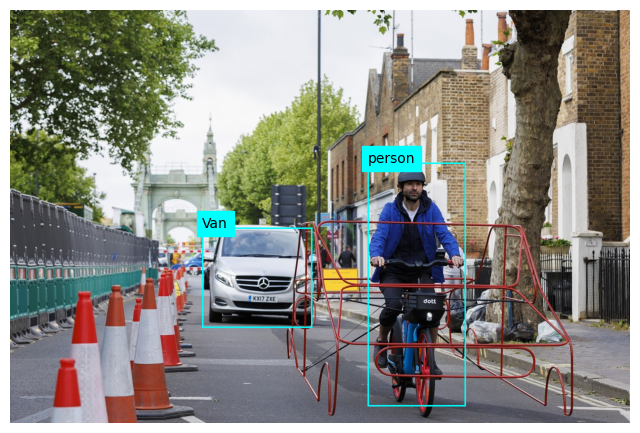

######### Object Detection Ends #########


In [5]:
analyse_and_create_bb("img3.jpg")

Plotting original image


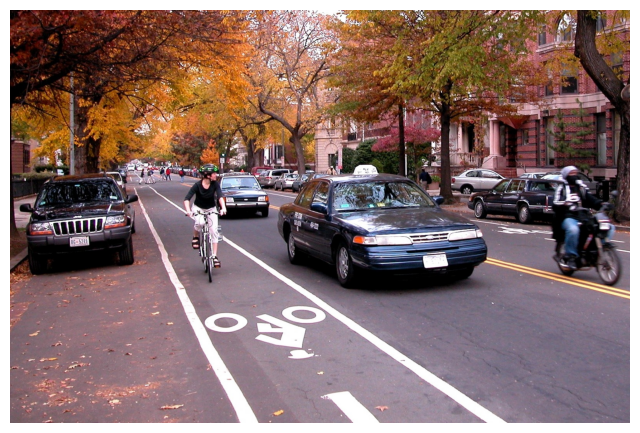

######### Feature Tagging Starts #########
'land vehicle' with confidence 99.94
'outdoor' with confidence 99.94
'vehicle' with confidence 99.87
'wheel' with confidence 99.53
'tree' with confidence 99.03
'road' with confidence 98.68
'street' with confidence 96.01
'bicycle' with confidence 91.96
'car' with confidence 89.47
'lane' with confidence 89.47
'tire' with confidence 87.06
'traffic' with confidence 86.76
'vehicle registration plate' with confidence 86.56
'city' with confidence 69.33
'fall' with confidence 48.27
'autumn' with confidence 44.4
######### Feature Tagging Ends ######### 

######### Brand Detection Starts #########
No brands detected in image.
######### Brand Detection Ends ######### 

######### Object Detection Starts #########
'car' with confidence 62.7 and boundary box as -> ((1140, 413), (1299, 496))
'car' with confidence 85.6 and boundary box as -> ((29, 436), (329, 679))
'car' with confidence 90.9 and boundary box as -> ((690, 426), (1233, 724))
'motorcycle' with c

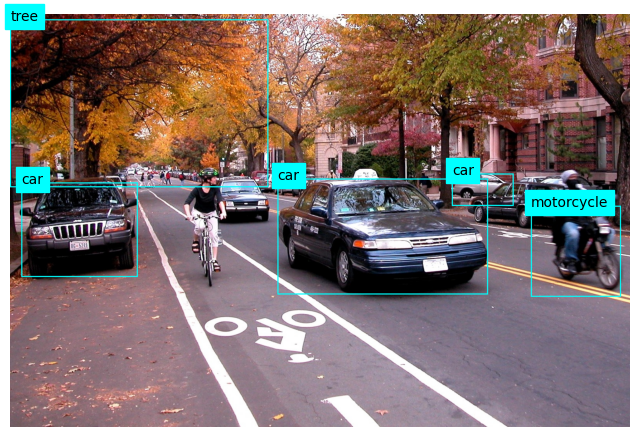

######### Object Detection Ends #########


In [6]:
analyse_and_create_bb("img4.jpg")